In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
columns = iris.feature_names
labels = iris.target

In [4]:
df = pd.DataFrame(iris.data, columns=columns)
df['label'] = labels

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

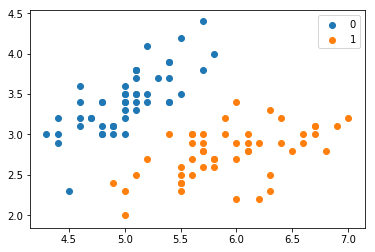

In [7]:
plt.scatter(df[:50]['sepal length (cm)'],df[:50]['sepal width (cm)'], label='0')
plt.scatter(df[50:100]['sepal length (cm)'],df[50:100]['sepal width (cm)'], label='1')
plt.legend()

In [8]:
data = np.array(df.iloc[:100,[0,1,-1]])
X, y = data[:100,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [9]:
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
    
    def sign(self, x, w, b):
        return np.dot(x, w) + b
    
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate*np.dot(y, X)
                    self.b = self.b + self.l_rate*y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Preceptron Model'
    
    def score(self):
        pass

In [10]:
preceptron = Model()
preceptron.fit(X, y)

'Preceptron Model'

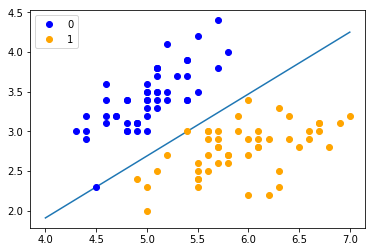

In [11]:
x_points = np.linspace(4, 7, 10)
y_ = -(preceptron.w[0] * x_points + preceptron.b) / preceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.legend()

In [24]:
from sklearn.linear_model import Perceptron

In [25]:
clf = Perceptron(fit_intercept=False, n_iter=1000, shuffle=False)
clf.fit(X, y)

d:\program files\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=False,
      max_iter=None, n_iter=1000, n_jobs=1, penalty=None, random_state=0,
      shuffle=False, tol=None, verbose=0, warm_start=False)

In [26]:
print(clf.coef_)

[[  74.6 -127.2]]


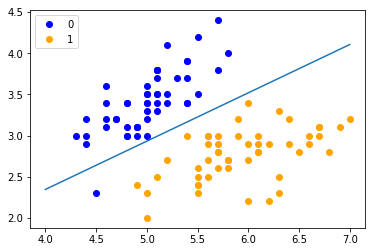

In [27]:
x_points = np.arange(4,8)
y_ = -(clf.coef_[0][0]*x_points + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.legend()

In [28]:
np.arange(4,7)

array([4, 5, 6])

In [29]:
preceptron.w

array([  7.8, -10. ])